In [1]:
import urllib.request

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/un_heliostato0500.png')

In [7]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)

In [8]:
BRG = cv2.imdecode(arr,-1)

In [9]:
img = cv2.cvtColor(BRG, cv2.COLOR_BGR2GRAY)

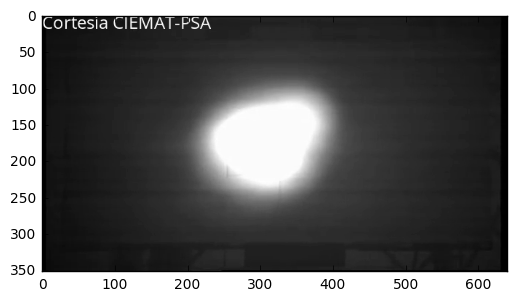

In [10]:
plt.imshow(img, cmap="gray")

In [11]:
ret,thresh = cv2.threshold(img,127,255,0)

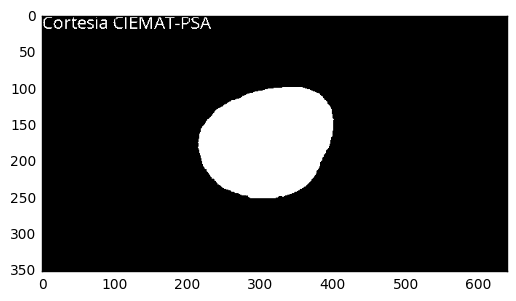

In [12]:
plt.imshow(thresh, cmap="gray")

In [13]:
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [14]:
M = cv2.moments(contours[0])
print(M)

{'m11': 1171239199.5416665, 'm21': 368031356785.31665, 'm10': 6776700.166666666, 'nu03': 0.0007606359277855494, 'nu20': 0.09749644317108229, 'nu21': -0.0018763539485228636, 'mu30': -126947667.09997559, 'nu30': -0.0017832056891902927, 'm00': 21926.5, 'nu02': 0.06759466467464528, 'm02': 694615225.0833333, 'mu03': 54150206.6363678, 'mu20': 46873501.69774866, 'm20': 2141310149.0833333, 'mu02': 32497581.720247746, 'm03': 132054116172.95001, 'm01': 3810239.1666666665, 'mu21': -133578957.19083595, 'mu12': 133341442.017313, 'nu11': -0.013249566910885283, 'nu12': 0.0018730176256240617, 'mu11': -6370012.862951517, 'm12': 212600290867.88333, 'm30': 690649609362.65}


In [15]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [16]:
print(cx, cy)

309 173


In [19]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [1, 0, 0, ..., 2, 2, 2],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

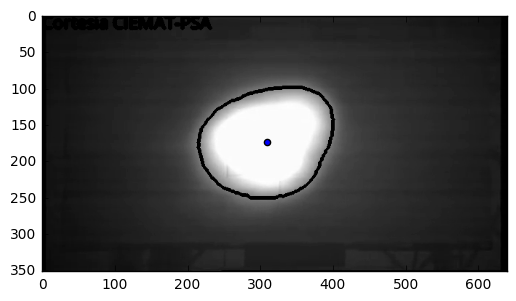

In [20]:
plt.scatter([cx],[cy])
plt.imshow(img, cmap="gray")